In [ ]:
# !pip install pandas openpyxl plotly seaborn jinja2

# pandas for analysis
- datasets
  - dictionary of items
  - list of dictionary
  - csv file
  - excel file
  - json file
  - sql connection
- creating dataframe
- reading data 
- selection of data
- manipulating data
- cleaning data
- visualizing data
- saving data

In [ ]:
import pandas as pd

In [ ]:
books = {
    'title': ['The art of war', 'The final empire'],
    'author': ['Sun Tzu','Brandon Sanderson'],
    'price': [399, 1099],
}
pd.DataFrame(books)

In [ ]:
movies = [
    {'title':"PK", 'director':"Rajkumar Hirani", 'year':2014},
    {'title':"I", 'director':"Shankar", 'year':2015},
    {'title':"Pink", 'director':"Aniruddha Roy Chowdhury", 'year':2016},
]
pd.DataFrame(movies)

In [ ]:
pd.read_csv('dummy.csv')

In [ ]:
pd.read_json('dummy.json')

In [ ]:
pd.read_excel(r'C:\Users\ZAID\Documents\dummy.xlsx')

In [ ]:
url = 'https://raw.githubusercontent.com/digipodium/Datasets/main/regression/kc_house_data.csv'
df = pd.read_csv(url)
df

first steps after reading the data
- `df.head(nrows)` - first n rows
- `df.tail(nrows)` - last n rows
- `df.sample(nrows)` - random n rows
- `df.info()` - data types, missing values
- `df.describe()` - summary statistics
- `df.shape` - number of rows and columns
- `df.columns` - column names

In [ ]:
df.head(2)

In [ ]:
df.tail()

In [ ]:
df.sample(3)

In [ ]:
df.info()

In [ ]:
df.describe() # summary statistics for numerical columns (default)

In [ ]:
df.describe(include='object') # summary statistics for object columns

In [ ]:
df.shape

In [ ]:
print(df.columns.tolist())

In [ ]:
# simple sort
df.sort_values('bedrooms')

# selecting data in pandas
- dataframe
  - rows
    - iloc - index based location
    - loc - label based location
  - columns
    - single column selection
    - multiple column selection
    - column selection by data type
  - conditional selection
    - boolean indexing
    - query method
  

In [ ]:
df

In [ ]:
# select rows from iloc
df.iloc[100] # idx 100 row

In [ ]:
# random 5 rows
df.iloc[[1,59,100,200,300]] # idx [1, 59, 100, 200, 300] rows

In [ ]:
# random 5 rows, with selected columns
df.iloc[[1,10,20], [0,11,12,3,4]]

In [ ]:
df.iloc[15:50, :10] # idx 15-49 rows, 0-9 columns

In [ ]:
# selecting columns based on indexes
df.iloc[:, [0,5,10,11]]

In [ ]:
# updating index column
df = df.set_index('id')
df.head()

In [ ]:
df.loc[[1954400510, 7202330790]]

### single column selection
- dictionary like selection
  - `dataframe['column_name']`
- object like selection
  - `dataframe.column_name`

### multiple column selection
- dictionary like selection
  - `dataframe[list_of_column_names]`

In [ ]:
df['price']

In [ ]:
df.bedrooms

In [ ]:
df[['bedrooms','price','sqft_living']]

In [ ]:
col_list = ['grade','condition','yr_built']
df[col_list]

# boolean indexing
`df['column] > value`

`df['column] == value`

`df['column] != value`

In [ ]:
df[df['price'] > 1000000]

In [ ]:
# 5 star rated houses + 2 floors
df[(df['condition']==5) & (df['floors'] == 2)]

In [ ]:
f1 = df['price'] > 1000000
f2 = df['condition'] == 5
f3 = df['floors'] == 2
df[f1 & f2 & f3]

In [ ]:
df[f1 & f2 & f3].reset_index().style.background_gradient(cmap='GnBu')

In [ ]:
df[f1 & f2 & f3].reset_index().style.set_properties(color='red', subset=['price'])

In [ ]:
# query
df.query('price > 2500000')

In [ ]:
df.query('price > 2500000 and condition == 5')

In [ ]:
df.query('price > 2500000 and condition == 5').sort_values('price')

### Manipulation and Cleaning data
- removing columns n rows
- renaming columns
- adding columns
- changing data types
- handling missing values
- dropping missing values
- using `apply()` method

In [ ]:
df.columns

In [ ]:
cols_to_drop = ['sqft_living15', 'sqft_lot15']
df = df.drop(columns=cols_to_drop)
df

In [ ]:
df.drop(labels=[7129300520, 6414100192, 5631500400])

In [ ]:
df.drop_duplicates(subset=['date']) # always use a subset column

In [ ]:
df.dropna() # remove rows with any NaN values

In [ ]:
# renaming columns
df.columns

In [ ]:
name_update = {
    'lat': 'latitude',
    'long': 'longitude',
}
df.rename(columns=name_update)

In [ ]:
# dummy column add
df['dummy'] = "house_price" # repeats same value in all rows
df

In [ ]:
df['age'] = 2024 - df['yr_built'] # add a new column age
df.head()

In [ ]:
df = df.drop(columns=['dummy'])

In [ ]:
# rearranging columns - first copy the columns
print(df.columns.tolist())

In [ ]:
# paste the list and rearrange columns as per your choice
columns_seq = ['date', 'bedrooms', 'bathrooms',  
            'floors', 'waterfront', 'view',  
            'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
            'yr_built', 'yr_renovated','age','condition', 'grade', 
            'zipcode', 'lat', 'long', 'price']
df = df[columns_seq].copy()  # copy the rearranged columns to df
df.head()

In [ ]:
df.floors.dtype

In [ ]:
df.floors.astype('int') # convert to int

In [ ]:
df.floors = df.floors.astype('int')
df.head()

In [ ]:
import numpy as np

In [ ]:
fake_df = pd.DataFrame({
    'A': [1,2,3,4,5],
    'B': [6,7,np.nan,9,10],
    'C': [11,12,13,14,None],
    'D': [16,17,np.nan,20, np.nan],
})
fake_df

In [ ]:
fake_df.dropna() # should not be done - rookie mistake

In [ ]:
df.isnull().sum()

In [ ]:
fake_df.isnull().sum()

In [ ]:
fake_df

In [ ]:
fake_df.fillna(0)

In [ ]:
b_mean = fake_df['B'].mean()
fake_df.B = fake_df.B.replace(np.nan, b_mean)
fake_df

In [ ]:
fake_df.D = fake_df.D.fillna(fake_df.D.mean()) # fill with mean
fake_df

# date time conversion - string to datetime
```
format  | meaning
%d      | day of the month 01-31
%m      | month of the year 01-12
%Y      | year
%H      | hour 00-23
%M      | minute 00-59
%S      | second 00-59
```


In [ ]:
from datetime import datetime
datestr = '20141013T000000'
date = datetime.strptime(datestr, '%Y%m%dT%H%M%S') # str, format
print(date, type(date))

In [ ]:
datestr = '10-01-2014 12:00'
format = '%d-%m-%Y %H:%M'
print(datetime.strptime(datestr, format))

In [ ]:
# testing an operation
df.date.apply(lambda d : datetime.strptime(d, '%Y%m%dT000000'))

In [ ]:
# updating the column with new values
df.date = df.date.apply(lambda d : datetime.strptime(d, '%Y%m%dT000000'))

# immigration data analysis

In [ ]:
df = pd.read_excel('Canada.xlsx', sheet_name=1, skiprows=20, skipfooter=2)
df.head(2)

- rename columns

In [ ]:
cols_to_rename ={
    'OdName': 'Country',
    'AreaName': 'Continent',
    'RegName': 'Region',
    'DevName': 'Status',
}
df = df.rename(columns=cols_to_rename)
df.head(2)

- drop columns

In [ ]:
# check no of nunique values in data
print("Type Unique values:", df.Type.nunique())
print("Coverage Unique values:", df.Coverage.nunique())

# count unique values in a column
print("Coverage Unique values count\n", df.Coverage.value_counts())

In [ ]:
cols_to_drop = ['AREA', 'REG', 'DEV', 'Type', 'Coverage']
df = df.drop(columns=cols_to_drop)
df.head(2)

set index - not for every dataframe you use

In [ ]:
df = df.set_index('Country')
df.head()

make all columns to lower case - optional step 

In [238]:
df.columns = [str(name).lower() for name in df.columns.tolist()]
df.head()

,continent,region,status,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [239]:
years = list(map(str, range(1980, 2014)))
print(years)

['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


- adding a column (total)

In [240]:
df[years].sum(axis=1) # axis=1 for row wise sum, default is 0 (column wise sum)

Country
Afghanistan       58639
Albania           15699
Algeria           69439
American Samoa        6
Andorra              15
                  ...  
Viet Nam          97146
Western Sahara        2
Yemen              2985
Zambia             1677
Zimbabwe           8598
Length: 195, dtype: int64

In [241]:
df['total'] = df[years].sum(axis=1)
df.head()

,continent,region,status,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


visualization

`no null values in dataset`

<Axes: >

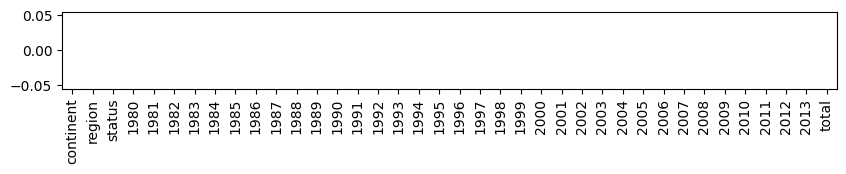

In [242]:
df.isnull().sum().plot(figsize=(10,1), kind='bar')

total immigration visualization

<Axes: title={'center': 'Total Immigration'}, xlabel='Country'>

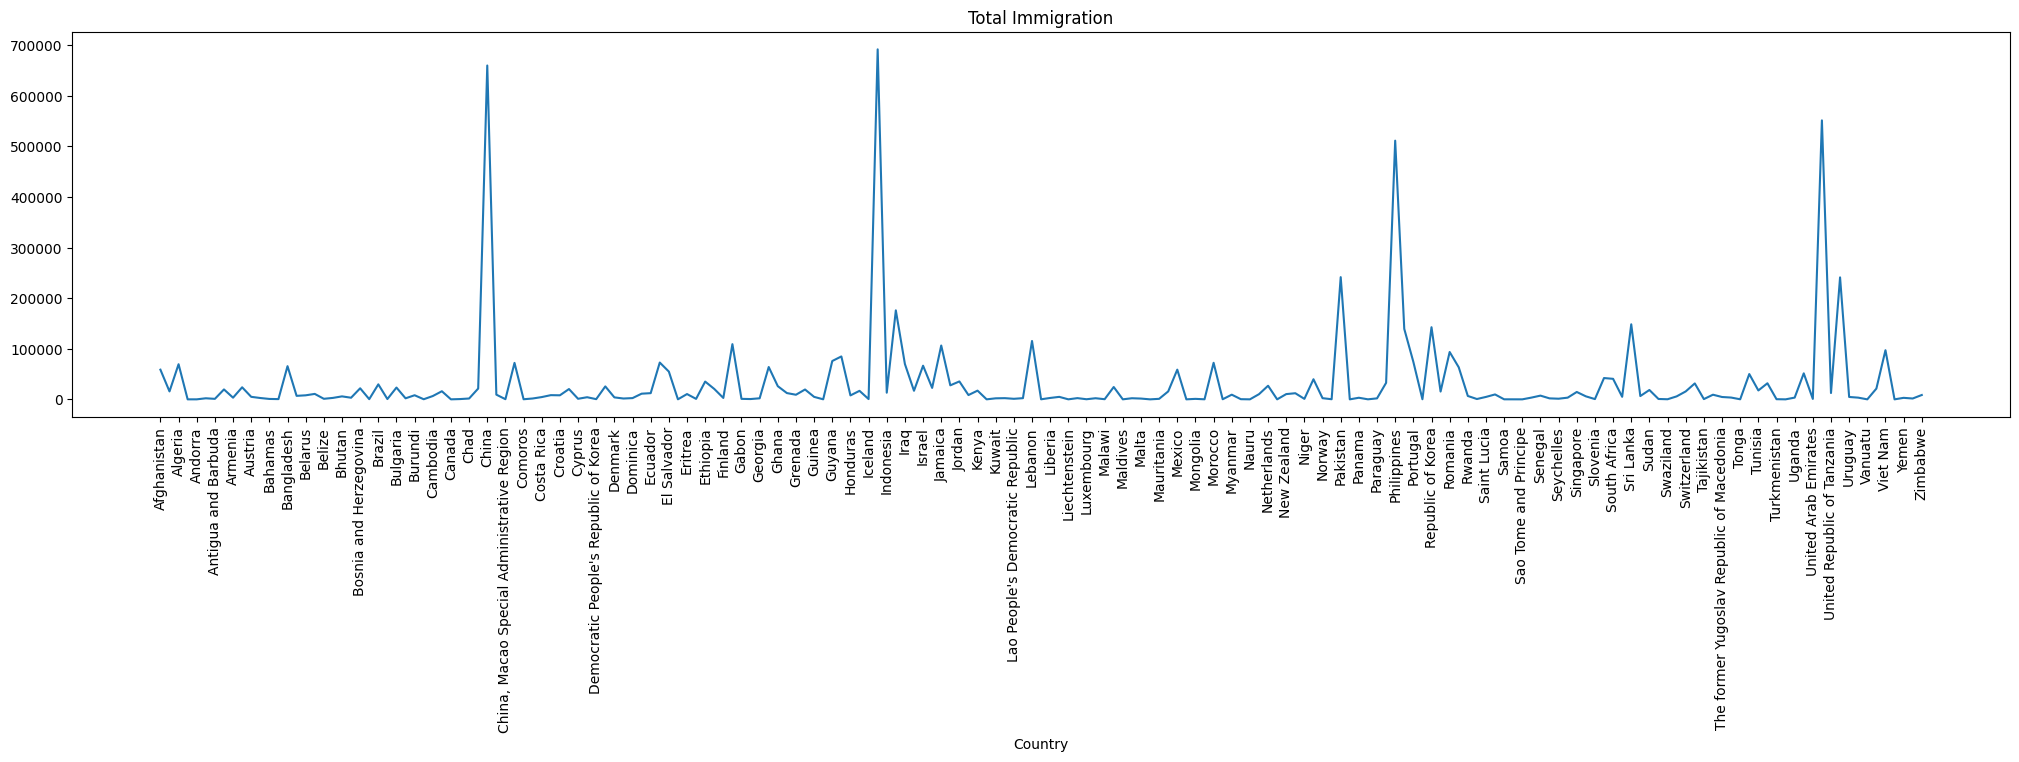

In [243]:
df.total.plot(rot=90, 
    figsize=(25,5),
    xticks=range(0, df.shape[0],2), 
    title='Total Immigration'
)

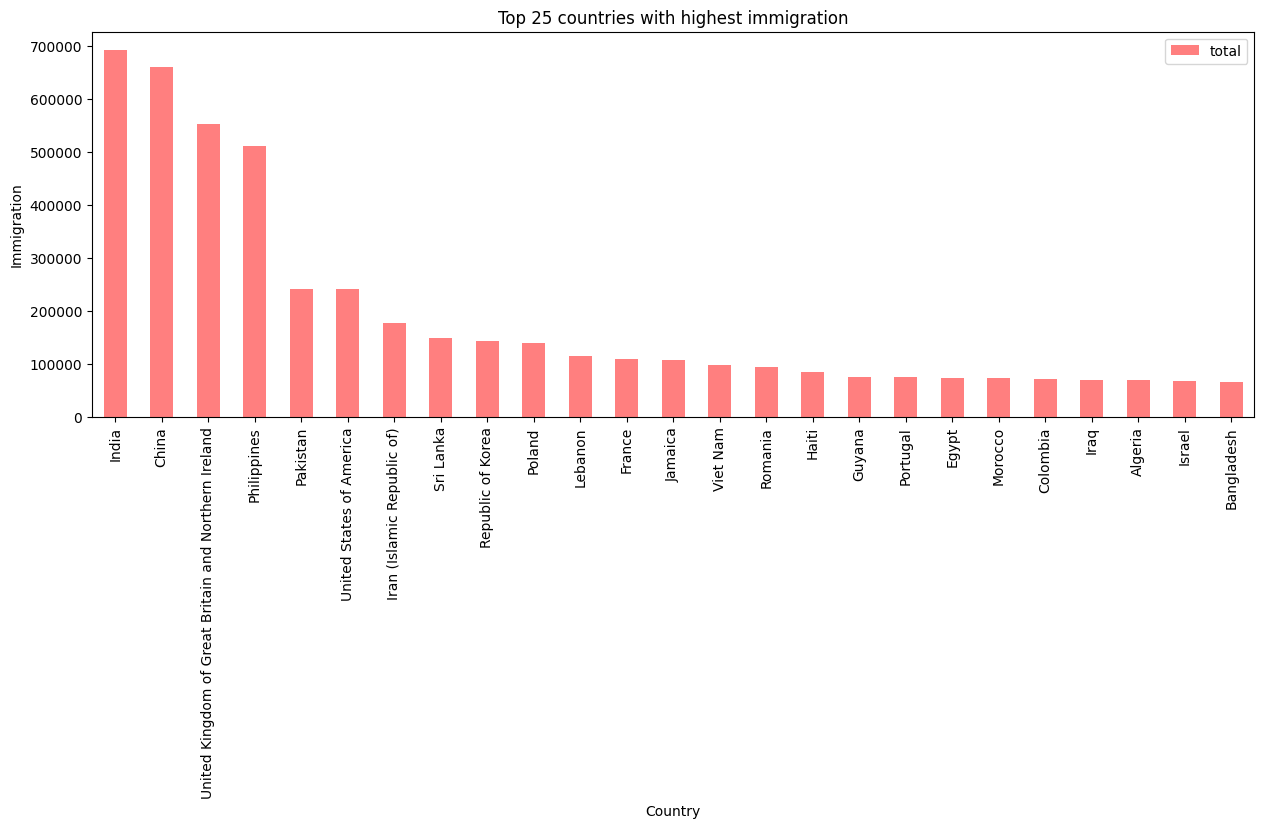

In [244]:
# top 25 countries with highest immigration
ax = df.sort_values('total', ascending=False).head(25).plot(
    kind='bar', 
    y='total', 
    figsize=(15,5),
    title='Top 25 countries with highest immigration',
    color = 'red',
    alpha=.5,
    xlabel='Country',
    ylabel='Immigration',
)